In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/My Drive/hackathon

[Errno 2] No such file or directory: 'drive/My Drive/hackathon'
/content/drive/My Drive/hackathon


In [4]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DIR = 'train1'

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

Average Height: 560.9143002028397
Max Height: 1080
Min Height: 439


Average Width: 643.9929006085192
Max Width: 720
Min Width: 460


In [0]:
pwd

'/content'

In [0]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DIR = 'train1'

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

Average Height: 560.9143002028397
Max Height: 1080
Min Height: 439


Average Width: 643.9929006085192
Max Width: 720
Min Width: 460


In [0]:
IMG_SIZE = 300

def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

In [0]:
def label_img(name):
    ans = [0,0,0,0]
    word_label = name.split('-')[0]
    if word_label == 'acne': ans= [1, 0, 0, 0]
    elif word_label == 'eczema' : ans = [0, 1, 0, 0]
    elif word_label == 'malignant' : ans = [0, 0, 1, 0]
    elif word_label == 'Psoriasis' : ans = [0, 0, 0, 1]
    return ans

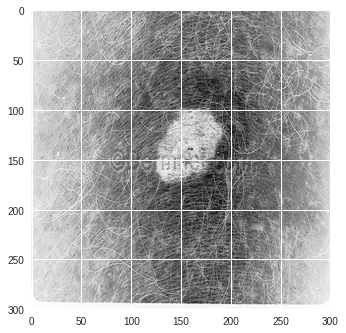

In [7]:
train_data = load_training_data()

plt.imshow(train_data[43][0])


In [8]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])
trainLabels


array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np
from keras.utils import np_utils
from keras.utils import to_categorical

Using TensorFlow backend.


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Flatten())

model.add(Dense(4, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
# trainLabels = trainLabels.reshape(-1,4)
trainLabels

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [12]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 10, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1972/1972 [==============================] - 451s 229ms/step - loss: 0.5233 - acc: 0.7759
Epoch 2/10
1972/1972 [==============================] - 449s 228ms/step - loss: 0.4001 - acc: 0.8186
Epoch 3/10
1972/1972 [==============================] - 447s 227ms/step - loss: 0.3457 - acc: 0.8504
Epoch 4/10
1972/1972 [==============================] - 448s 227ms/step - loss: 0.2968 - acc: 0.8684
Epoch 5/10
1972/1972 [==============================] - 446s 226ms/step - loss: 0.2604 - acc: 0.8893
Epoch 6/10
1972/1972 [==============================] - 449s 228ms/step - loss: 0.2492 - acc: 0.8917
Epoch 7/10
1972/1972 [==============================] - 450s 228ms/step - loss: 0.2211 - acc: 0.9030
Epoch 8/10
1972/1972 [==============================] - 452s 229ms/step - loss: 0.1964 - acc: 0.9165
Epoch 9/10
1972/1972 [==============================] - 452s 229ms/step - loss: 0.1739 - acc: 0.9286
Epoch 10/10
1972/1972 [====================

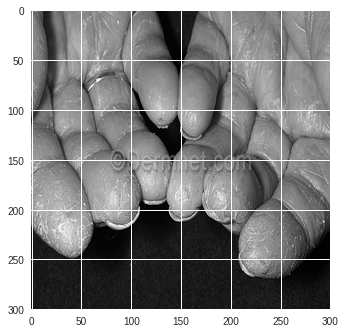

In [13]:

# Test on Test Set
TEST_DIR = 'test1'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


test_data = load_test_data()    
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [14]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

79.27927933297715


In [40]:
abc = model.predict(testImages)[3]
if np.argmax(abc) == 0: str_label = 'acne'
elif np.argmax(abc) == 1: str_label = 'eczema'
elif np.argmax(abc) == 2: str_label = 'melanoma'
elif np.argmax(abc) == 3: str_label = 'Psoriasis'
status = 'Unhealthy'
result = 'Status: ' + status + '.'
result += 'Disease: ' + str_label + '.'
result

'Status: Unhealthy.Disease: melanoma.'

In [43]:
testLabels[:4]

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [35]:
model.predict(testImages[-10:])


array([[1.8556293e-03, 4.4223391e-03, 9.8247266e-01, 1.1249407e-02],
       [3.0311415e-01, 1.1685872e-01, 7.7120766e-02, 5.0290638e-01],
       [1.2695490e-03, 4.1287560e-02, 1.1892169e-02, 9.4555068e-01],
       [1.9699859e-02, 3.0994685e-03, 9.7305173e-01, 4.1489638e-03],
       [2.5933904e-03, 3.9698951e-02, 4.5027800e-02, 9.1267979e-01],
       [1.4008768e-01, 7.2151953e-01, 1.1395935e-02, 1.2699687e-01],
       [8.8808540e-04, 1.8845636e-02, 9.6830273e-01, 1.1963570e-02],
       [4.8950766e-03, 6.5108198e-03, 9.8435360e-01, 4.2405254e-03],
       [1.3903099e-03, 2.7783787e-01, 7.8323476e-02, 6.4244837e-01],
       [1.1514607e-02, 3.5070345e-02, 1.9788034e-02, 9.3362701e-01]],
      dtype=float32)

In [36]:
testLabels[-10:]

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]])